# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

# Build query URL
query_url = f"{url}&APPID={weather_api_key}"

# Set up empty lists to hold data from call

city_name = []
country = []
lat = []
lng = []
date = []
cloudiness = []
humidity = []
max_temp = []
wind_speed = []

# Setting the beginning of the loop

count = 1

# Start loop statement

print(f"Beginning Data Retrieval")
print(f"-----------------------")

# Initialize loop

for city in cities:
    
    try:
        response = requests.get(f"{query_url}&q={city}").json()
    
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        date.append(response["dt"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
    
        wind_speed.append(response["wind"]["speed"])
        
        current_city = response["name"]
        
        # Include a print log of each city as its being processed
        print(f"Processing Record {count} | {current_city}")
        
        count = count + 1 
    
    except:
        print("No city found...")
    continue
 
# End of loop statement
print("----------------------")
print("Ending Data Retrieval")

Beginning Data Retrieval
-----------------------
Processing Record 1 | Ostrovnoy
Processing Record 2 | Torbay
Processing Record 3 | Butaritari
Processing Record 4 | Portland
Processing Record 5 | Ponta do Sol
Processing Record 6 | Ushuaia
Processing Record 7 | Jamestown
Processing Record 8 | Saint-Philippe
Processing Record 9 | Avarua
Processing Record 10 | Punta Arenas
Processing Record 11 | Rikitea
Processing Record 12 | San Cristobal
Processing Record 13 | Arraial do Cabo
Processing Record 14 | Hong Kong
Processing Record 15 | Touros
Processing Record 16 | Kaihua
Processing Record 17 | Brody
Processing Record 18 | Port Elizabeth
Processing Record 19 | Albany
Processing Record 20 | Bonanza
Processing Record 21 | Funadhoo
Processing Record 22 | Port Macquarie
Processing Record 23 | Ōzu
Processing Record 24 | Novikovo
No city found...
Processing Record 25 | Fes
Processing Record 26 | Tiksi
Processing Record 27 | Busselton
Processing Record 28 | Dawei
Processing Record 29 | Westport
Pro

Processing Record 240 | Tarabuco
Processing Record 241 | Phalodi
Processing Record 242 | Alamosa
Processing Record 243 | Ransang
Processing Record 244 | Montepuez
Processing Record 245 | Verkhniy Avzyan
Processing Record 246 | Mandurah
Processing Record 247 | Ponta Delgada
Processing Record 248 | Haines Junction
No city found...
Processing Record 249 | Barra Patuca
Processing Record 250 | Noumea
Processing Record 251 | New Norfolk
Processing Record 252 | Bima
Processing Record 253 | Zhigansk
Processing Record 254 | Bengkulu
No city found...
Processing Record 255 | Alice
Processing Record 256 | Batemans Bay
Processing Record 257 | Puteyets
Processing Record 258 | Jalu
Processing Record 259 | Ilulissat
Processing Record 260 | Exeter
No city found...
Processing Record 261 | Kangaatsiaq
Processing Record 262 | Araouane
Processing Record 263 | Yatou
Processing Record 264 | Machalí
Processing Record 265 | Vostok
Processing Record 266 | Noyabrsk
Processing Record 267 | Tomatlán
Processing Rec

Processing Record 476 | Polunochnoye
Processing Record 477 | Gogrial
No city found...
Processing Record 478 | Tanete
Processing Record 479 | Hirado
No city found...
Processing Record 480 | Neftçala
Processing Record 481 | Ketchikan
Processing Record 482 | Alanya
Processing Record 483 | Stornoway
Processing Record 484 | Hay River
Processing Record 485 | Iranshahr
Processing Record 486 | West Wendover
Processing Record 487 | Stony Plain
Processing Record 488 | Tura
Processing Record 489 | Arrondissement de Saint-Denis
Processing Record 490 | Aketi
Processing Record 491 | Balkanabat
Processing Record 492 | Madimba
Processing Record 493 | Palmer
Processing Record 494 | Melo
Processing Record 495 | Taguatinga
Processing Record 496 | Fortuna
Processing Record 497 | Wagar
Processing Record 498 | Wuwei
Processing Record 499 | Goundam
Processing Record 500 | Weleri
No city found...
Processing Record 501 | Traralgon
Processing Record 502 | Khovd
Processing Record 503 | Rome
Processing Record 504

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
# Create dictionary with weather city data

weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "Longtitude": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Date": date
}

# Convert dictionary to dataframe

weatherpy_data = pd.DataFrame(weather_dict)

weatherpy_data.to_csv('output_data/cities.csv')

weatherpy_data.head()

,City,Country,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Ostrovnoy,RU,68.0531,39.5131,-5.91,91,24,4.41,1613240153
1,Torbay,CA,47.6666,-52.7314,28.99,63,75,14.97,1613240111
2,Butaritari,KI,3.0707,172.7902,81.23,76,75,6.62,1613240121
3,Portland,US,45.5234,-122.6762,28.40,80,90,17.27,1613239819
4,Ponta do Sol,PT,32.6667,-17.1000,60.01,71,0,3.00,1613240116


In [30]:
# Display dataframe stats with describe function

weatherpy_data.describe()

,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,19.890382,20.162472,50.602273,72.096154,54.229021,8.155787,1.613240e+09
std,32.999551,89.789070,33.398936,20.260463,38.491453,6.324192,1.311814e+02
min,-54.800000,-175.200000,-31.940000,1.000000,0.000000,0.310000,1.613240e+09
25%,-7.659325,-59.957300,28.030000,64.000000,16.000000,3.440000,1.613240e+09
50%,22.180350,24.508750,62.365000,77.000000,68.000000,6.910000,1.613240e+09
75%,46.518350,100.340125,78.457500,86.000000,90.000000,11.427500,1.613240e+09
max,78.218600,179.316700,102.160000,100.000000,100.000000,46.080000,1.613240e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
weatherpy_data = weatherpy_data[weatherpy_data["Humidity"] <= 100]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

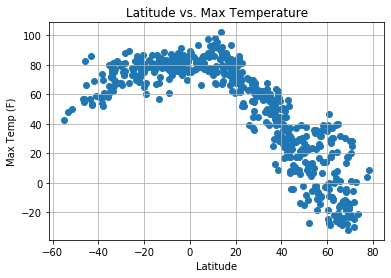

In [32]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Max Temp']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latmaxtemp.png")

plt.show()

## Latitude vs. Humidity Plot

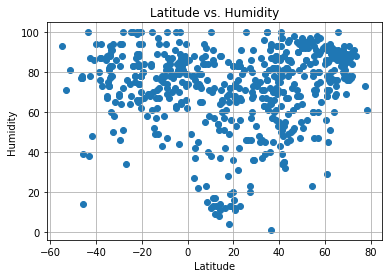

In [33]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Humidity']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/lathumidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

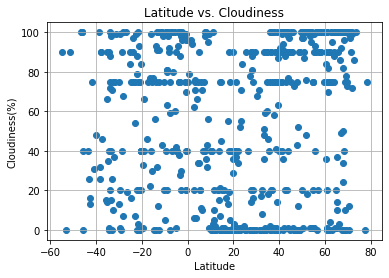

In [34]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Cloudiness']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latcloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

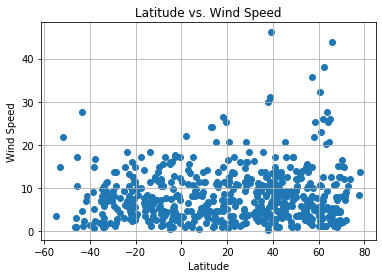

In [35]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Wind Speed']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latwindspeed.png")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6067787924298291


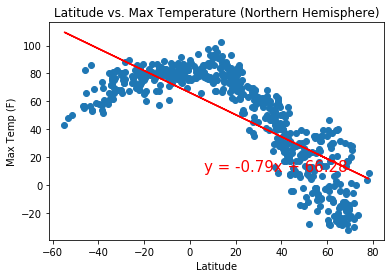

<Figure size 432x288 with 0 Axes>

In [36]:
#x_valuesn = weatherpy_data[['Latitude'] > 0]
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latmaxtempregression_north.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6067787924298291


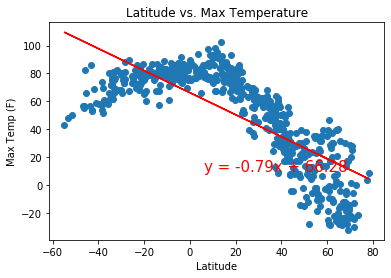

<Figure size 432x288 with 0 Axes>

In [37]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latmaxtempregression_south.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0017295477223855588


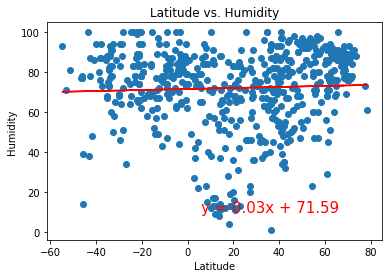

<Figure size 432x288 with 0 Axes>

In [38]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/lathumidityregression_north.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0017295477223855588


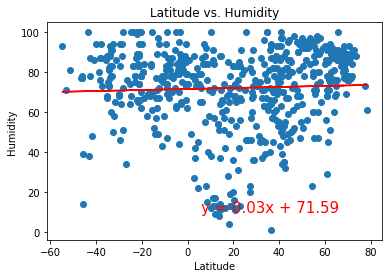

<Figure size 432x288 with 0 Axes>

In [39]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/lathumidityregression_south.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19271709080794233


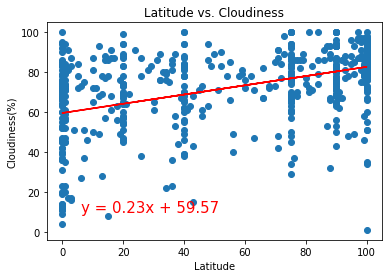

<Figure size 432x288 with 0 Axes>

In [40]:
x_values = weatherpy_data['Cloudiness']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latcloudinessregression_north.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19271709080794233


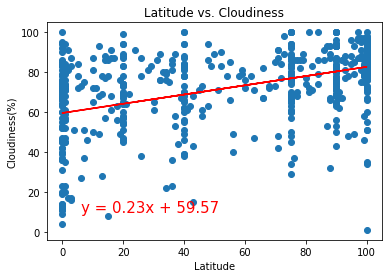

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = weatherpy_data['Cloudiness']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latcloudinessregression_south.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0071550052833139685


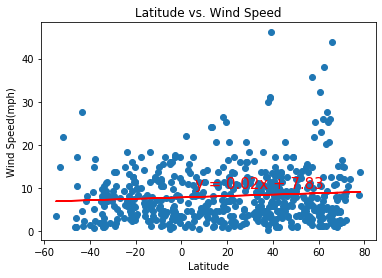

<Figure size 432x288 with 0 Axes>

In [42]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latwindregression_north.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0071550052833139685


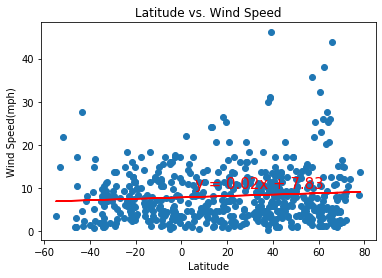

<Figure size 432x288 with 0 Axes>

In [43]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latwindregression_south.png")

plt.show()